In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

def compare_cpu_energy_plot(df1,df2,label1,label2,application_name):
    fig = plt.subplots(figsize =(20, 12))
    # set height of bar
    barWidth = 0.5
    br1 = np.arange(len(df1.index))
    br2 = [x + barWidth for x in br1]
    plt.bar(br1, 100 - 100* df2.JoulesCpuAll / df1.JoulesCpuAll, color ='r', width = barWidth,
            edgecolor ='grey', label ='CPU_Energy')
    plt.bar(br2, 100 - 100* df2.Time / df1.Time, color ='g', width = barWidth,
            edgecolor ='grey', label ='Time')
    plt.xlabel("Threads")
    plt.ylabel("Proportion (%)")
    plt.title("Comparaison of the execution time and cpu energy consumption of "+application_name+" Application between "+label1+" and "+label2+" Pthreads implementations")
    plt.legend()
    plt.show()
    
def compare_dram_energy_plot(df1,df2,label1,label2,application_name):
    fig = plt.subplots(figsize =(20, 12))
    # set height of bar
    barWidth = 0.5
    br1 = np.arange(len(df1.index))
    br2 = [x + barWidth for x in br1]
    plt.bar(br1, 100 - 100* df2.JoulesDramAll / df1.JoulesDramAll, color ='r', width = barWidth,
            edgecolor ='grey', label ='DRAM_Energy')
    plt.bar(br2, 100 - 100* df2.Time / df1.Time, color ='g', width = barWidth,
            edgecolor ='grey', label ='Time')
    plt.xlabel("Threads")
    plt.ylabel("Proportion (%)")
    plt.title("Comparaison of the execution time and DRAM energy consumption of "+application_name+" Application between "+label1+" and "+label2+" Pthreads implementations")
    plt.legend()
    plt.show()
    
def compare_gpu_energy_plot(df1,df2,label1,label2,application_name):
    fig = plt.subplots(figsize =(20, 12))
    # set height of bar
    barWidth = 0.5
    br1 = np.arange(len(df1.index))
    br2 = [x + barWidth for x in br1]
    plt.bar(br1, 100 - 100* df2.NVML_Energy / df1.NVML_Energy, color ='r', width = barWidth,
            edgecolor ='grey', label ='GPU_Energy')
    plt.bar(br2, 100 - 100* df2.Time / df1.Time, color ='g', width = barWidth,
            edgecolor ='grey', label ='Time')
    plt.xlabel("Threads")
    plt.ylabel("Proportion (%)")
    plt.title("Comparaison of the execution time and GPU energy consumption of "+application_name+" Application between "+label1+" and "+label2+" Pthreads implementations")
    plt.legend()
    plt.show()

# Ferret benchmark results

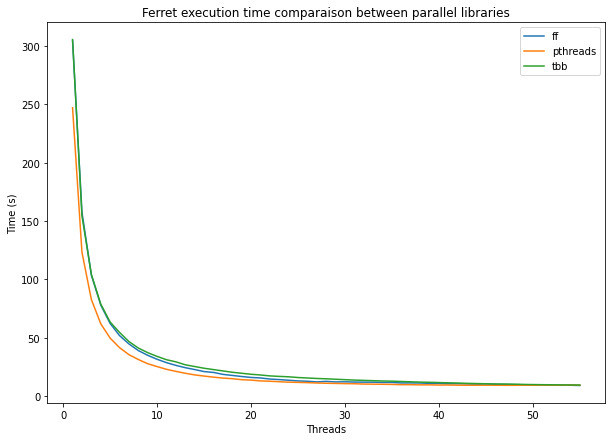

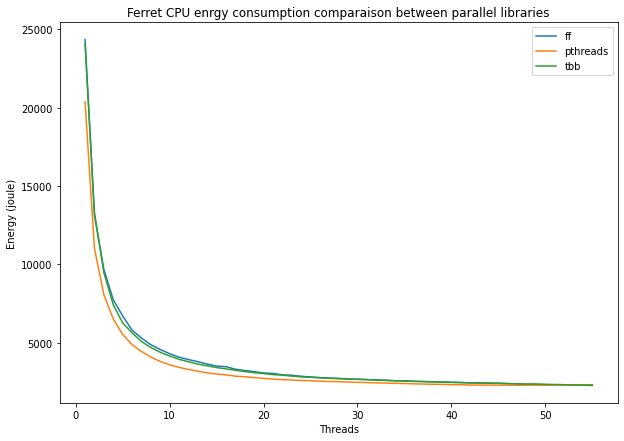

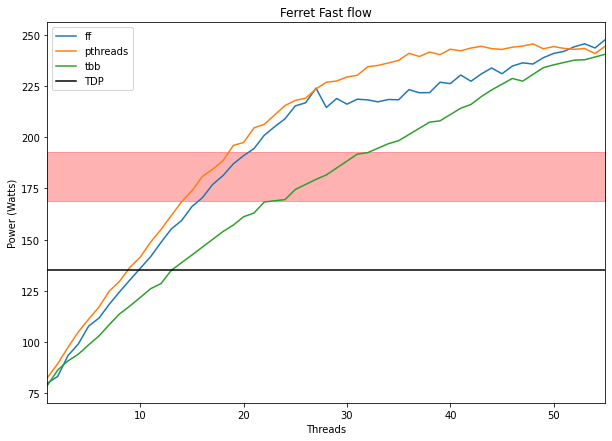

In [16]:
# Ferret benchmark results
ferret_ff = pd.read_csv("ferret/benchmark-gcc-ff.out")
ferret_pthreads = pd.read_csv("ferret/benchmark-gcc-pthreads.out")
ferret_tbb = pd.read_csv("ferret/benchmark-gcc-tbb.out")

plt.figure(figsize=(10, 7))
plt.plot(ferret_ff.Threads, ferret_ff.Time,label = "ff")
plt.plot(ferret_pthreads.Threads, ferret_pthreads.Time, label = "pthreads")
plt.plot(ferret_tbb.Threads, ferret_tbb.Time, label = "tbb")
plt.title("Ferret execution time comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ferret_ff.Threads, ferret_ff.JoulesCpuAll,label = "ff")
plt.plot(ferret_pthreads.Threads, ferret_pthreads.JoulesCpuAll, label = "pthreads")
plt.plot(ferret_tbb.Threads, ferret_tbb.JoulesCpuAll, label = "tbb")
plt.title("Ferret CPU enrgy consumption comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Energy (joule)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ferret_ff.Threads,ferret_ff.JoulesCpuAll/ ferret_ff.Time,label = "ff")
plt.plot(ferret_pthreads.Threads,ferret_pthreads.JoulesCpuAll/ ferret_pthreads.Time,label = "pthreads")
plt.plot(ferret_tbb.Threads,ferret_tbb.JoulesCpuAll/ ferret_tbb.Time,label = "tbb")
plt.axhline(y=135, color='black', linestyle='-', label="TDP")
Max_1 = 135*100/80
Max_2 = 135*100/70
plt.xlim([1,55])
plt.plot(Max_1, color='r', linestyle='-')
plt.plot(Max_2, color='r', linestyle='-')
plt.fill_between(ferret_ff.Threads, Max_1, Max_2, color='r', alpha=0.3)
plt.title("Ferret Fast flow")
plt.xlabel("Threads")
plt.ylabel("Power (Watts)")
plt.legend()
plt.show()

## Ferret : tbb vs pthreads

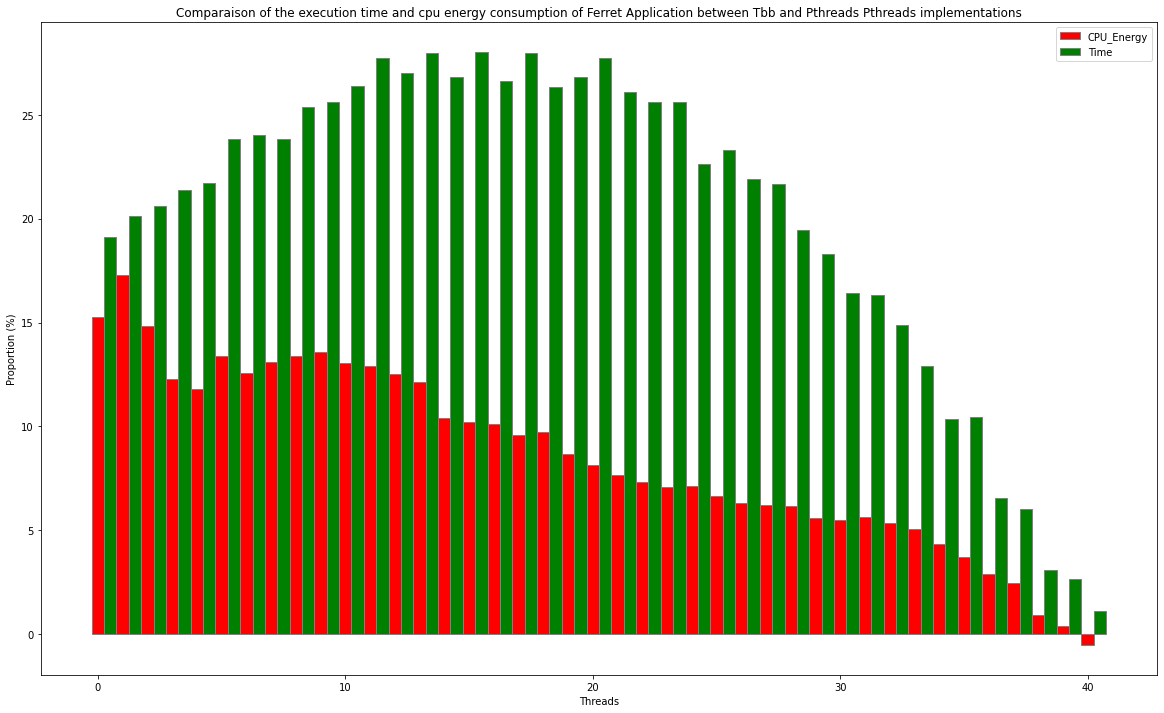

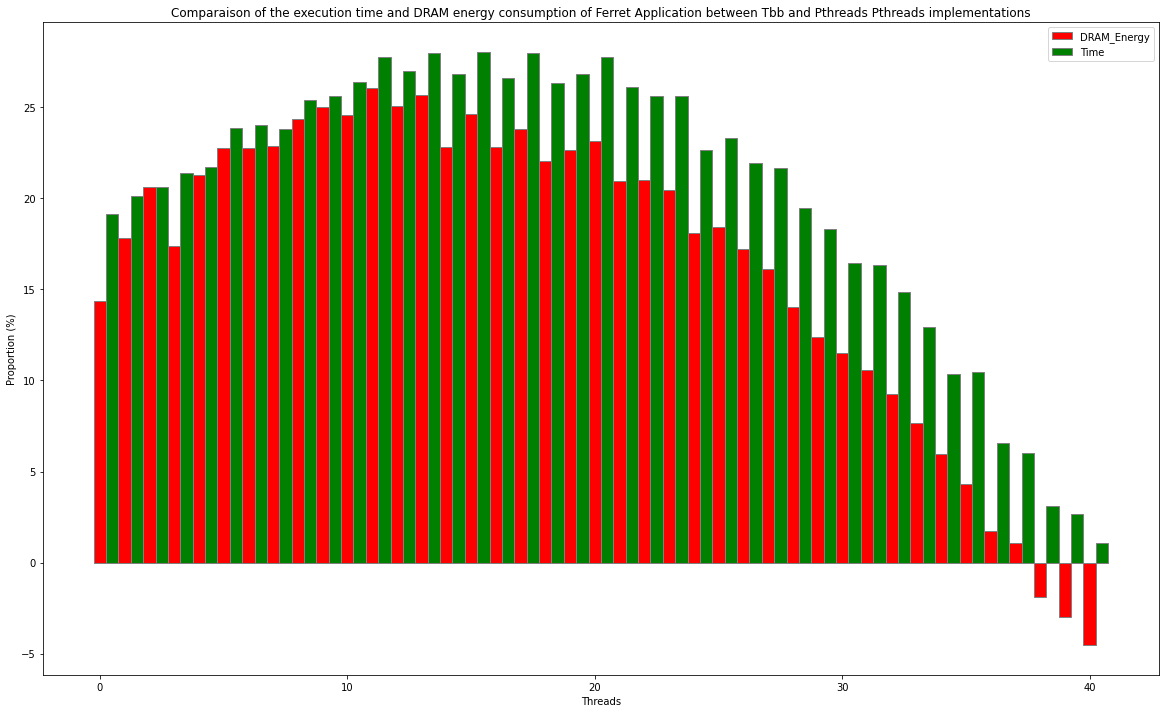

In [17]:
bad_data_ferret = ferret_pthreads.index.isin([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53])
compare_cpu_energy_plot(ferret_tbb,
                        ferret_pthreads.drop([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53]).reset_index(drop=True),
                        "Tbb","Pthreads","Ferret")
compare_dram_energy_plot(ferret_tbb,
                         ferret_pthreads.drop([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53]).reset_index(drop=True),
                         "Tbb","Pthreads","Ferret")
# compare_gpu_energy_plot(ferret_tbb,
#                         ferret_pthreads.drop([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53]).reset_index(drop=True),
#                         "Tbb","Pthreads","Ferret")

## Ferret : tbb vs ff

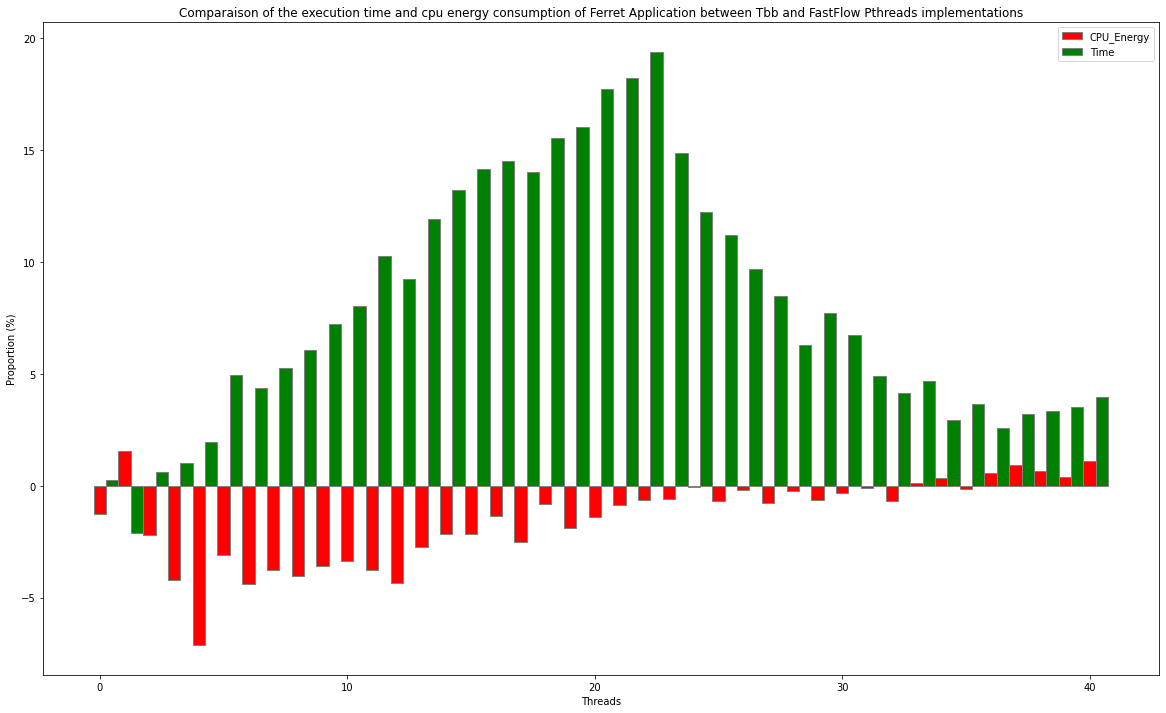

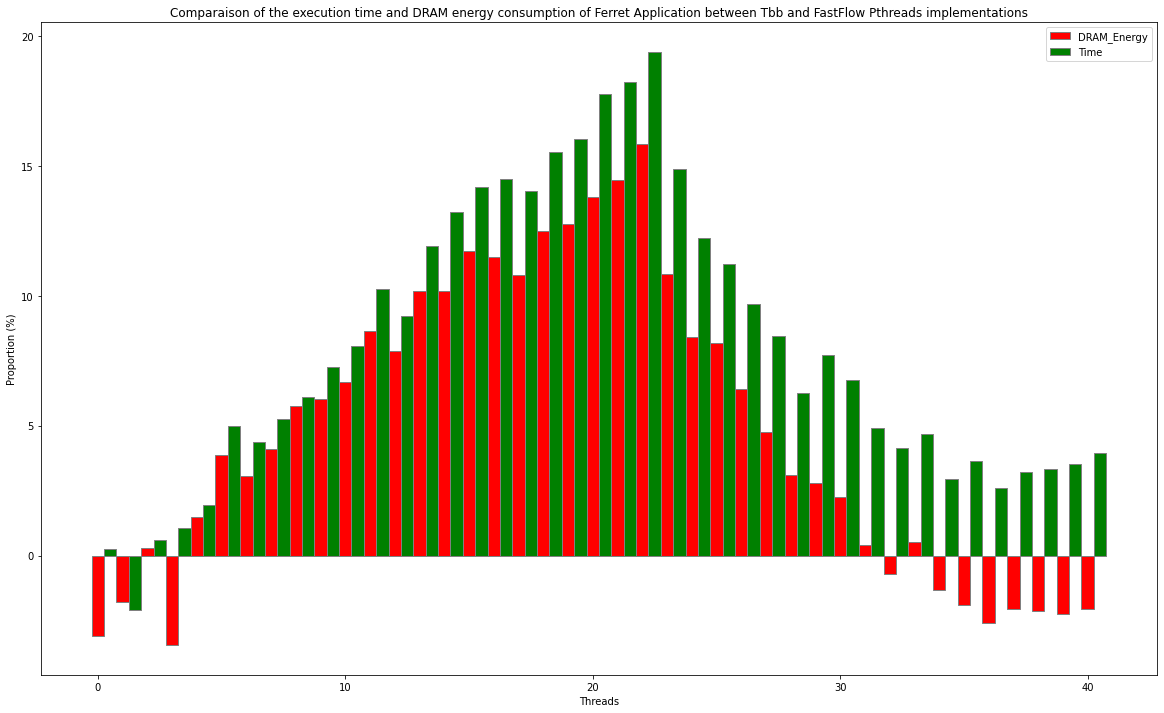

In [18]:
compare_cpu_energy_plot(ferret_tbb,ferret_ff.drop([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53]).reset_index(drop=True),"Tbb","FastFlow", "Ferret")
compare_dram_energy_plot(ferret_tbb,ferret_ff.drop([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53]).reset_index(drop=True),"Tbb","FastFlow","Ferret")
#compare_gpu_energy_plot(ferret_tbb,ferret_ff.drop([13,15,16,25,28,29,39,32,35,36,39,44,47,50,53]).reset_index(drop=True),"Tbb","FastFlow","Ferret")

## Ferret : ff vs pthreads

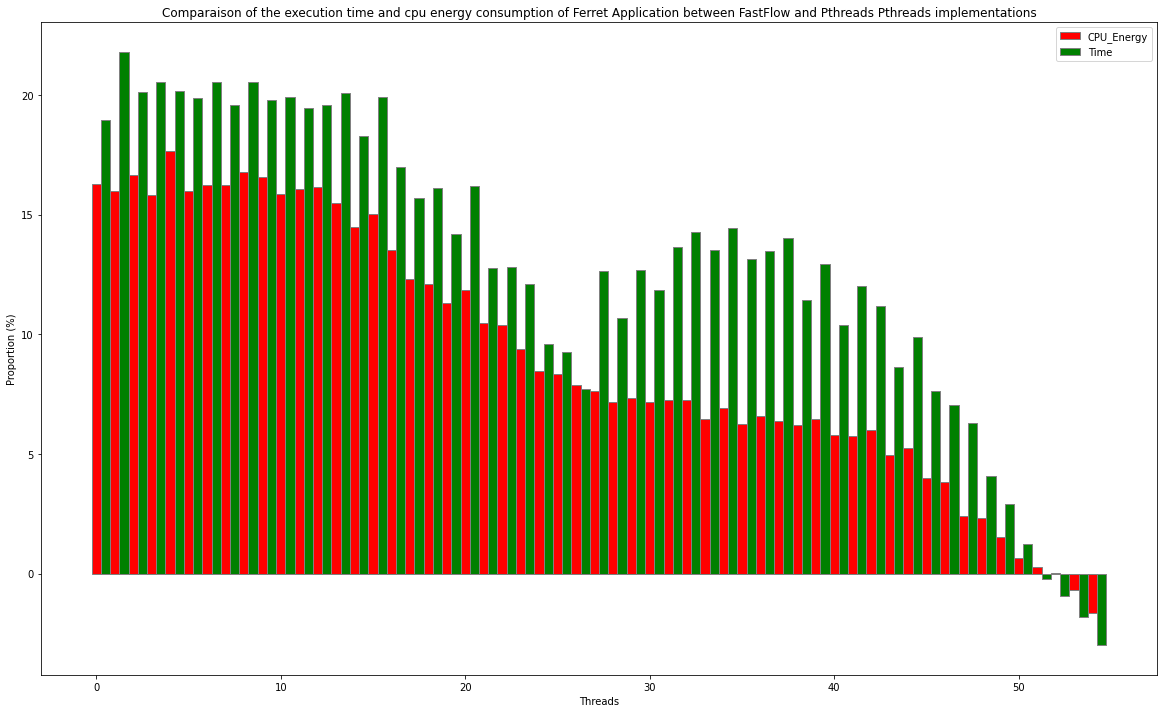

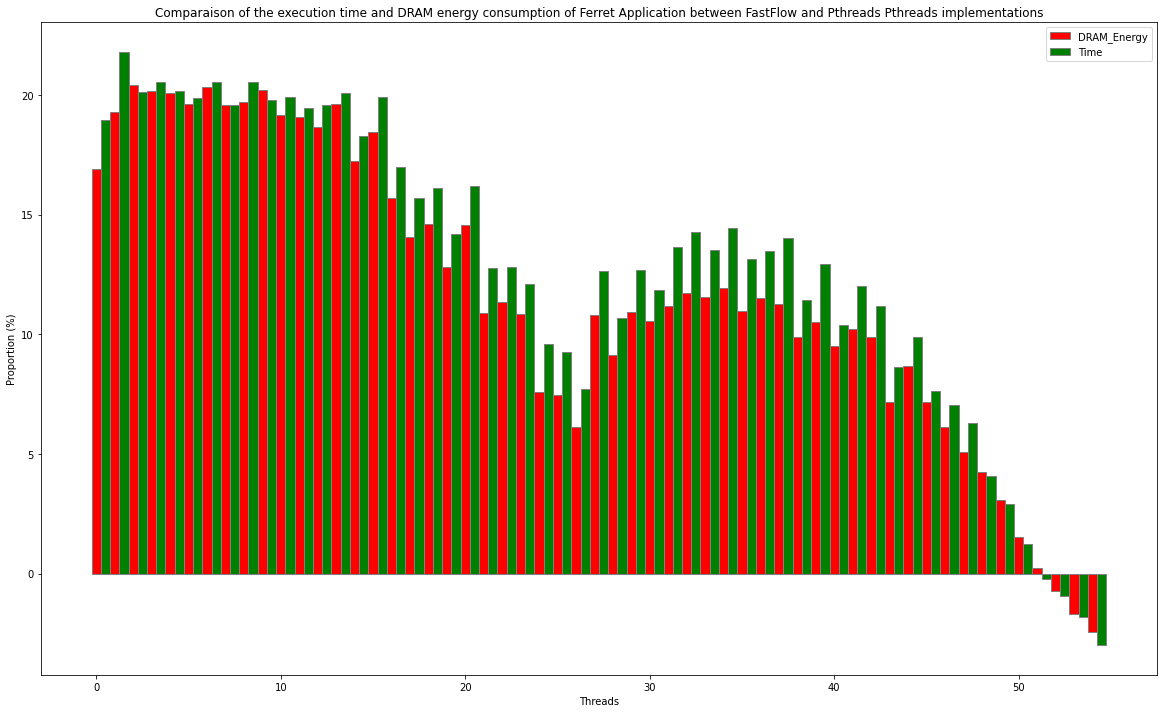

In [19]:
compare_cpu_energy_plot(ferret_ff,ferret_pthreads,"FastFlow","Pthreads","Ferret")
compare_dram_energy_plot(ferret_ff,ferret_pthreads,"FastFlow","Pthreads","Ferret")
#compare_gpu_energy_plot(ferret_ff,ferret_pthreads,"FastFlow","Pthreads","Ferret")

# Blackscholes benchmark results

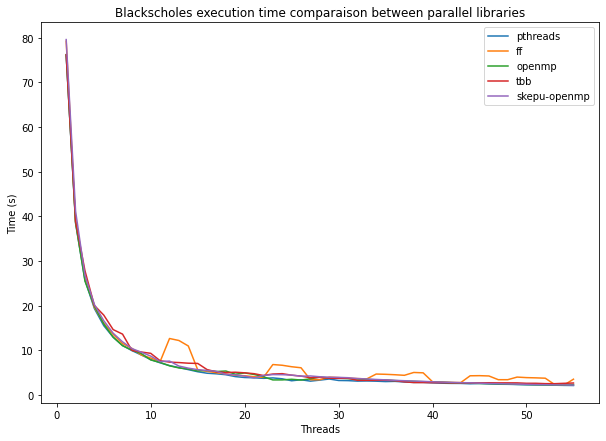

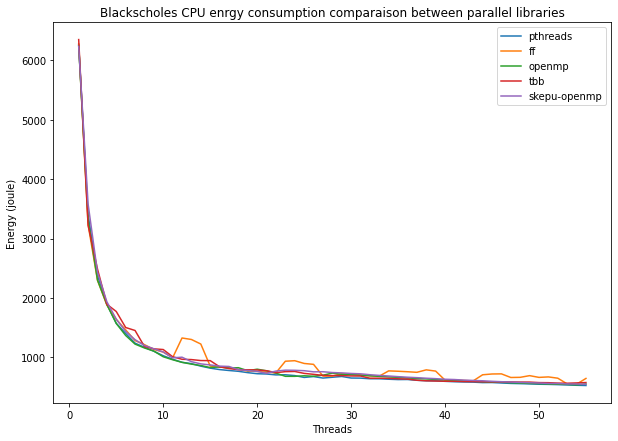

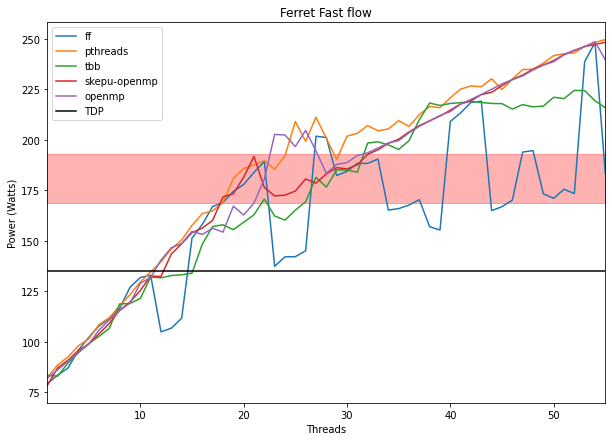

In [3]:
# Blackscholes benchmark results
blackscholes_pthreads = pd.read_csv("blackscholes/benchmark-gcc-pthreads-55.out")
blackscholes_ff = pd.read_csv("blackscholes/benchmark-gcc-ff-55.out")
blackscholes_openmp = pd.read_csv("blackscholes/benchmark-gcc-openmp-55.out")
blackscholes_tbb = pd.read_csv("blackscholes/benchmark-gcc-tbb-55.out")
blackscholes_skepu_openmp = pd.read_csv("blackscholes/benchmark-gcc-skepu-openmp-55.out")
blackscholes_hybrid = pd.read_csv("blackscholes/benchmark-gcc-skepu-hybrid.out")

plt.figure(figsize=(10, 7))
plt.plot(blackscholes_pthreads.Threads, blackscholes_pthreads.Time,label = "pthreads")
plt.plot(blackscholes_ff.Threads, blackscholes_ff.Time, label = "ff")
plt.plot(blackscholes_openmp.Threads, blackscholes_openmp.Time, label = "openmp")
plt.plot(blackscholes_tbb.Threads, blackscholes_tbb.Time, label = "tbb")
plt.plot(blackscholes_skepu_openmp.Threads, blackscholes_skepu_openmp.Time, label = "skepu-openmp")
plt.title("Blackscholes execution time comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Time (s)")
plt.legend()
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(blackscholes_pthreads.Threads, blackscholes_pthreads.JoulesCpuAll,label = "pthreads")
plt.plot(blackscholes_ff.Threads, blackscholes_ff.JoulesCpuAll, label = "ff")
plt.plot(blackscholes_openmp.Threads, blackscholes_openmp.JoulesCpuAll, label = "openmp")
plt.plot(blackscholes_tbb.Threads, blackscholes_tbb.JoulesCpuAll, label = "tbb")
plt.plot(blackscholes_skepu_openmp.Threads, blackscholes_skepu_openmp.JoulesCpuAll, label = "skepu-openmp")
plt.title("Blackscholes CPU enrgy consumption comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Energy (joule)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(blackscholes_ff.Threads,blackscholes_ff.JoulesCpuAll/ blackscholes_ff.Time,label = "ff")
plt.plot(blackscholes_pthreads.Threads,blackscholes_pthreads.JoulesCpuAll/ blackscholes_pthreads.Time,label = "pthreads")
plt.plot(blackscholes_tbb.Threads,blackscholes_tbb.JoulesCpuAll/ blackscholes_tbb.Time,label = "tbb")
plt.plot(blackscholes_skepu_openmp.Threads,blackscholes_skepu_openmp.JoulesCpuAll/ blackscholes_skepu_openmp.Time,label = "skepu-openmp")
plt.plot(blackscholes_openmp.Threads,blackscholes_openmp.JoulesCpuAll/ blackscholes_openmp.Time,label = "openmp")
plt.axhline(y=135, color='black', linestyle='-', label="TDP")
Max_1 = 135*100/80
Max_2 = 135*100/70
plt.xlim([1,55])
plt.plot(Max_1, color='r', linestyle='-')
plt.plot(Max_2, color='r', linestyle='-')
plt.fill_between(blackscholes_tbb.Threads, Max_1, Max_2, color='r', alpha=0.3)
plt.title("Ferret Fast flow")
plt.xlabel("Threads")
plt.ylabel("Power (Watts)")
plt.legend()
plt.show()

## Blackscholes : FF vs Pthreads

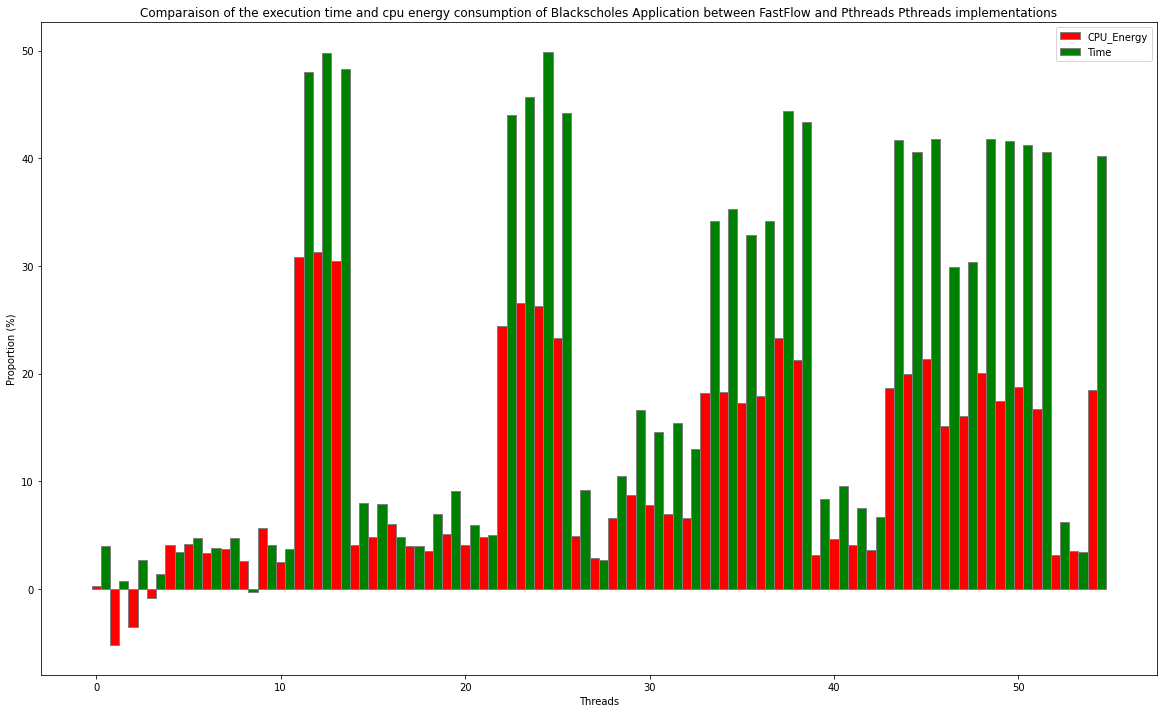

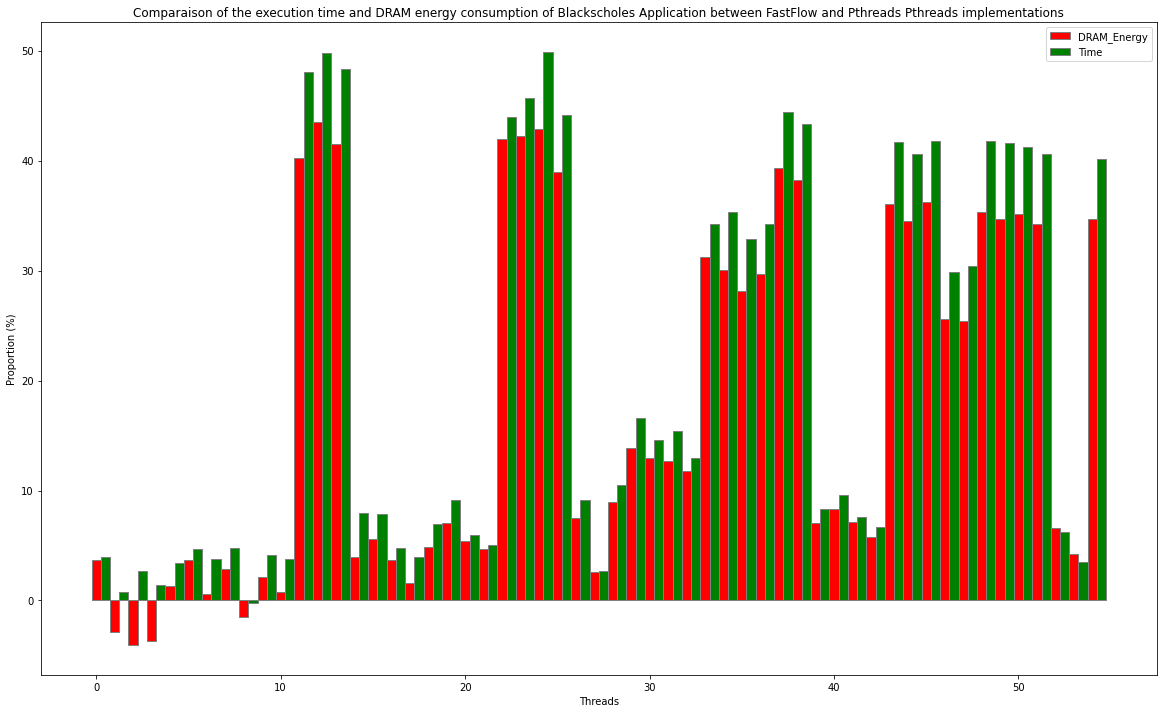

In [4]:
compare_cpu_energy_plot(blackscholes_ff,blackscholes_pthreads,"FastFlow","Pthreads","Blackscholes")
compare_dram_energy_plot(blackscholes_ff,blackscholes_pthreads,"FastFlow","Pthreads","Blackscholes")

## Blackscholes : Tbb vs Pthreads

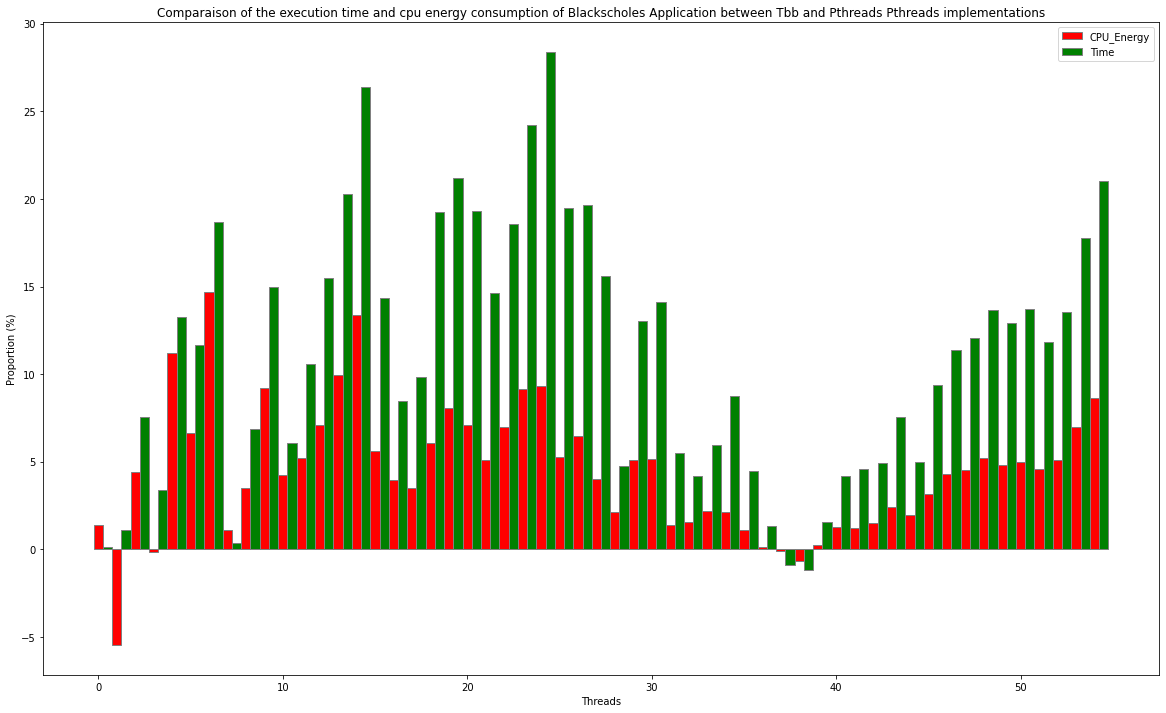

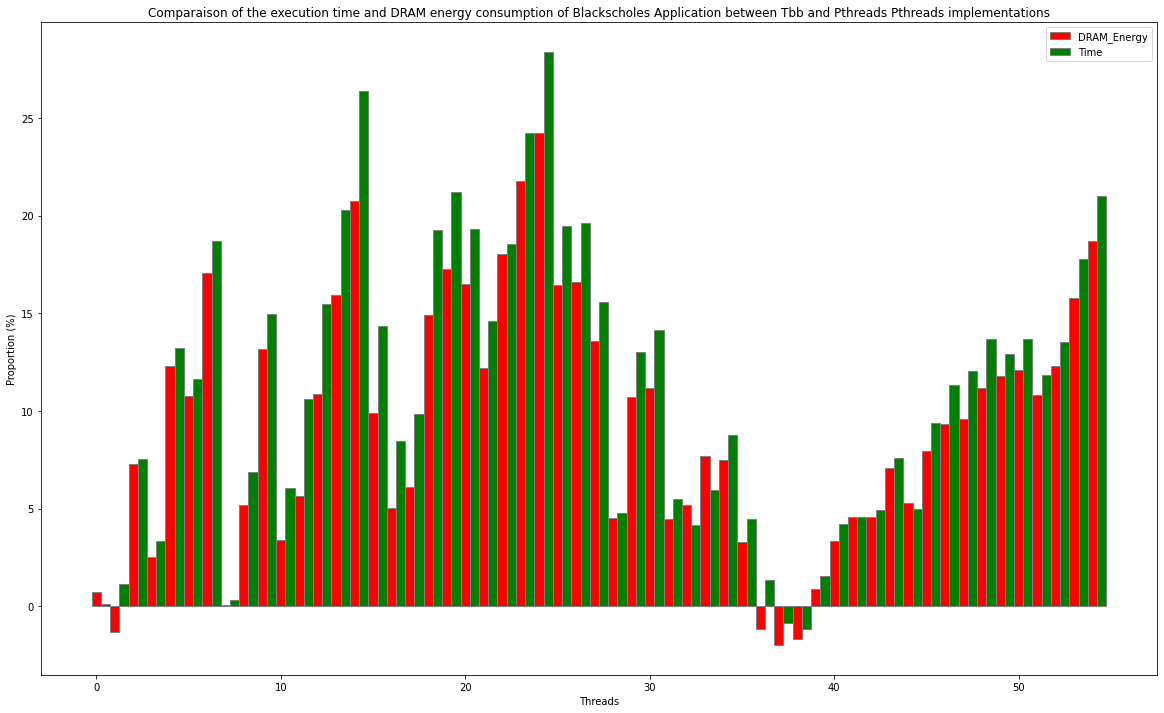

In [5]:
compare_cpu_energy_plot(blackscholes_tbb,blackscholes_pthreads,"Tbb","Pthreads","Blackscholes")
compare_dram_energy_plot(blackscholes_tbb,blackscholes_pthreads,"Tbb","Pthreads","Blackscholes")

## Blackscholes : Openmp vs Pthreads

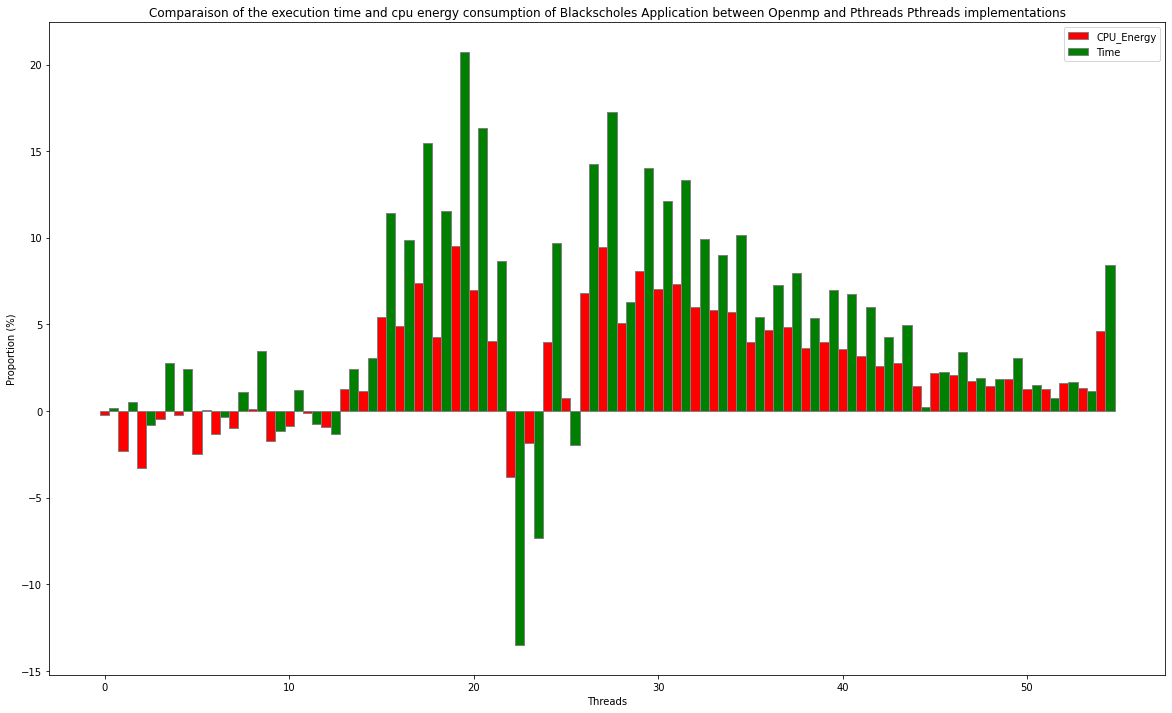

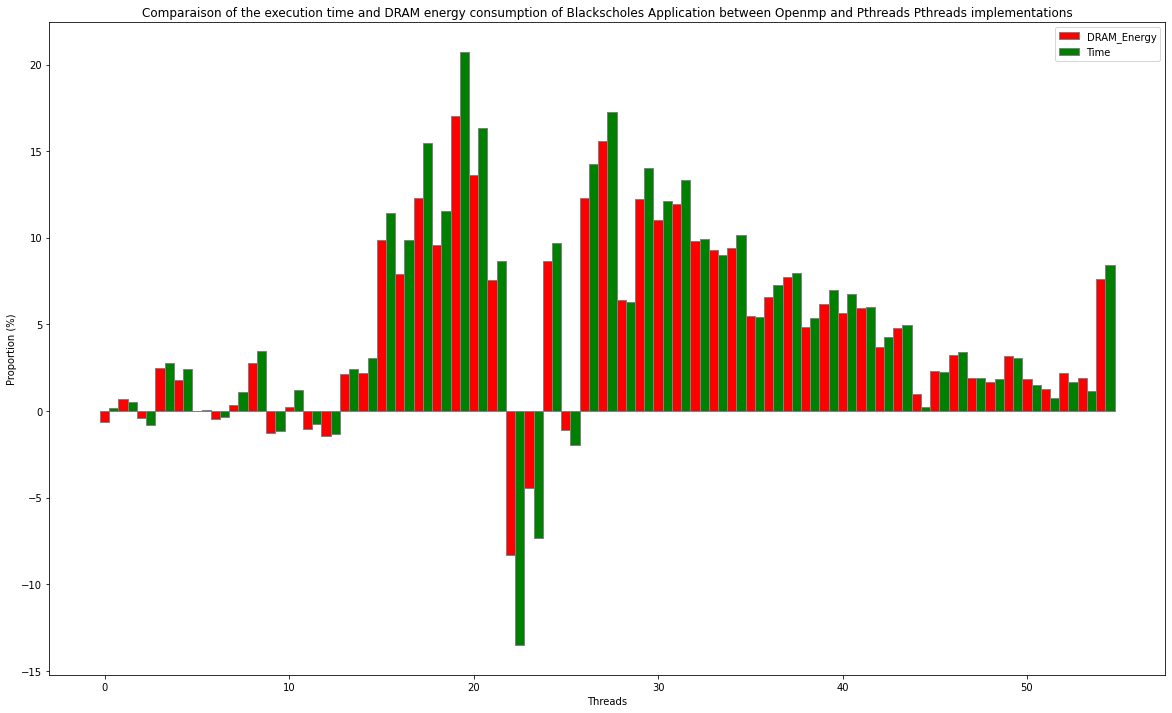

In [6]:
compare_cpu_energy_plot(blackscholes_openmp,blackscholes_pthreads,"Openmp","Pthreads","Blackscholes")
compare_dram_energy_plot(blackscholes_openmp,blackscholes_pthreads,"Openmp","Pthreads","Blackscholes")

## Blackscholes : Skepu_Openmp vs Pthreads

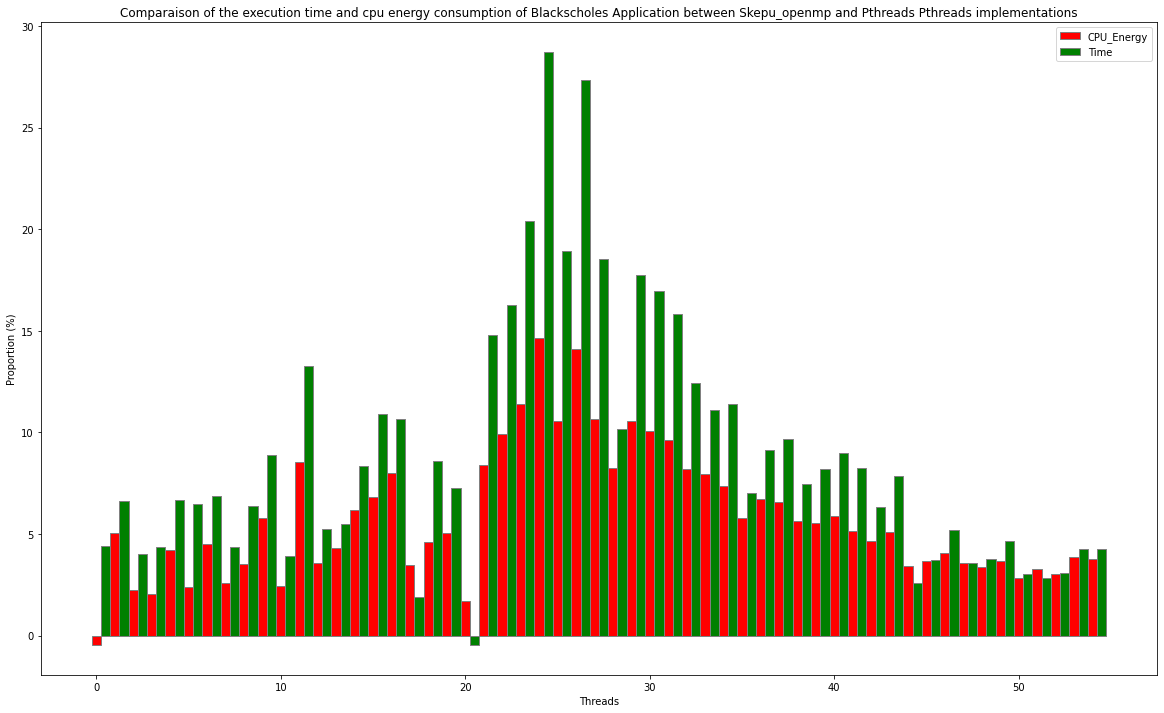

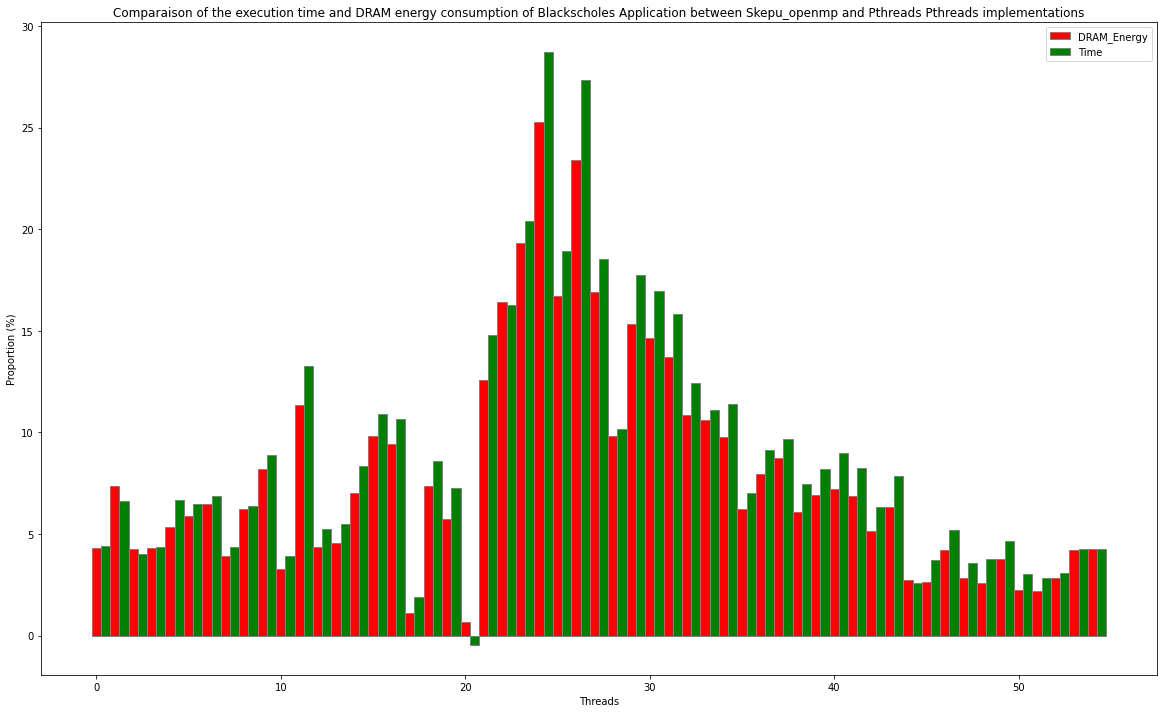

In [7]:
compare_cpu_energy_plot(blackscholes_skepu_openmp,blackscholes_pthreads,"Skepu_openmp","Pthreads","Blackscholes")
compare_dram_energy_plot(blackscholes_skepu_openmp,blackscholes_pthreads,"Skepu_openmp","Pthreads","Blackscholes")

## Blackscholes : Skepu_OpenMp vs OpenMp

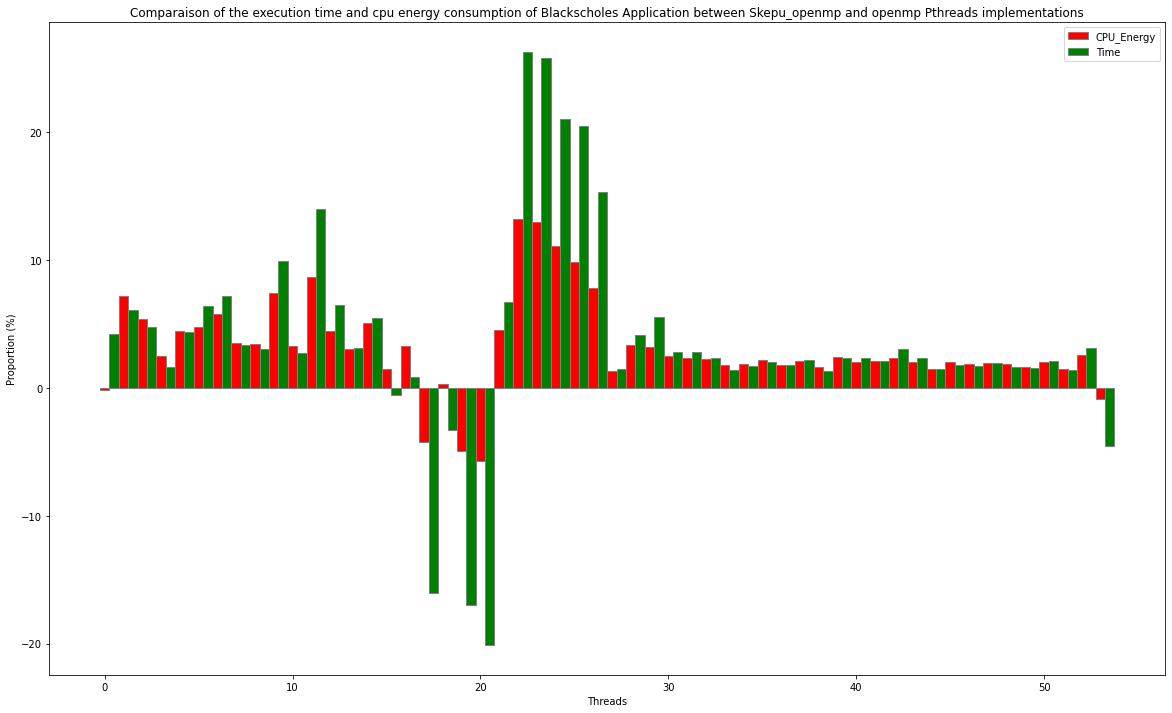

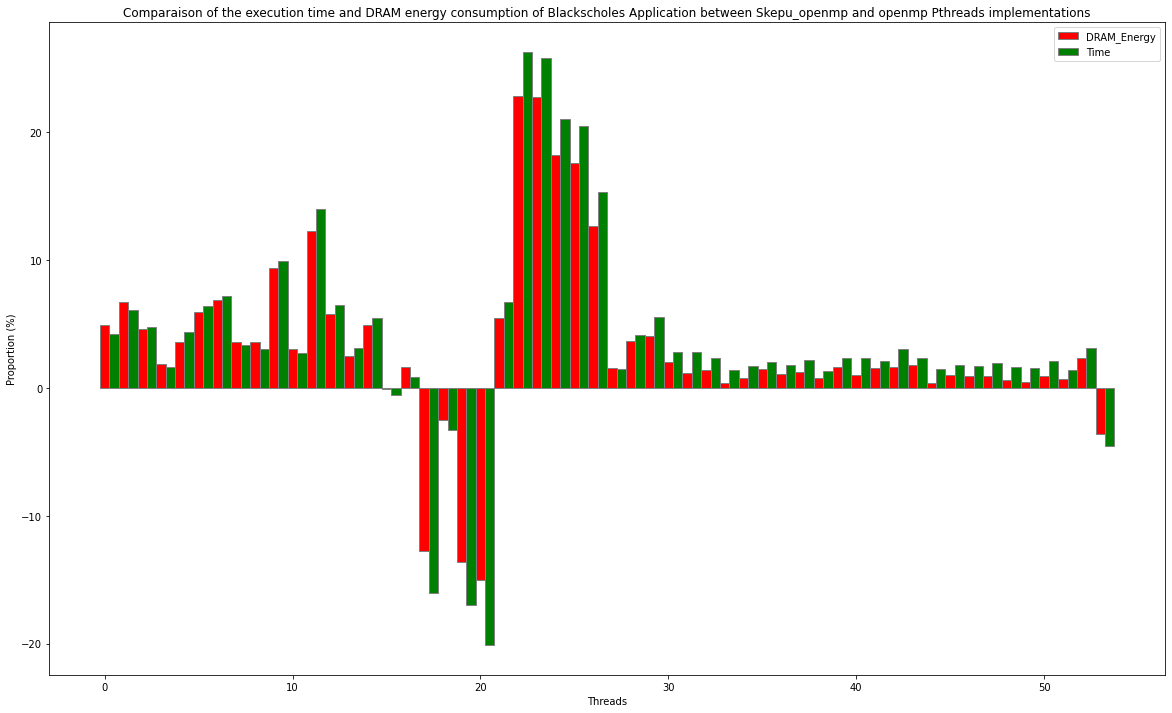

In [8]:
bad_data = blackscholes_skepu_openmp.index.isin([29])
compare_cpu_energy_plot(blackscholes_skepu_openmp[~bad_data],blackscholes_openmp[~bad_data],"Skepu_openmp","openmp", "Blackscholes")
compare_dram_energy_plot(blackscholes_skepu_openmp[~bad_data],blackscholes_openmp[~bad_data],"Skepu_openmp","openmp", "Blackscholes")

# Facesim benchmark results

In [20]:
facesim_ff = pd.read_csv("facesim/benchmark-gcc-ff-new.out")
facesim_pthreads = pd.read_csv("facesim/benchmark-gcc-pthreads-new.out")

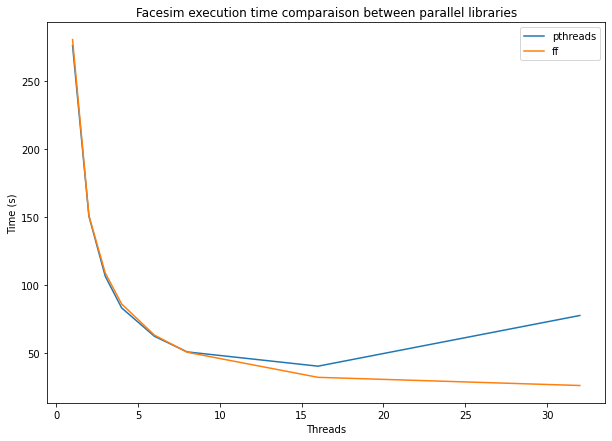

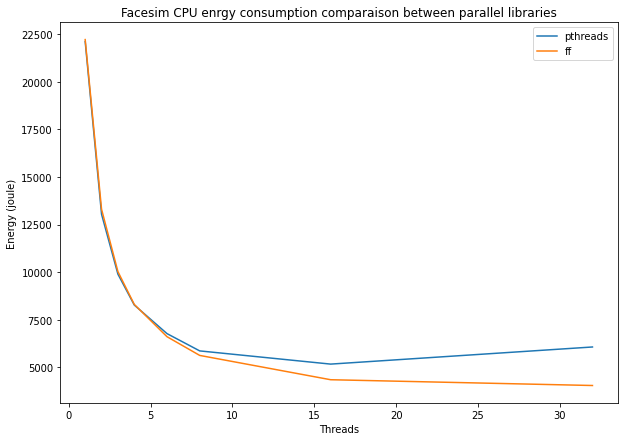

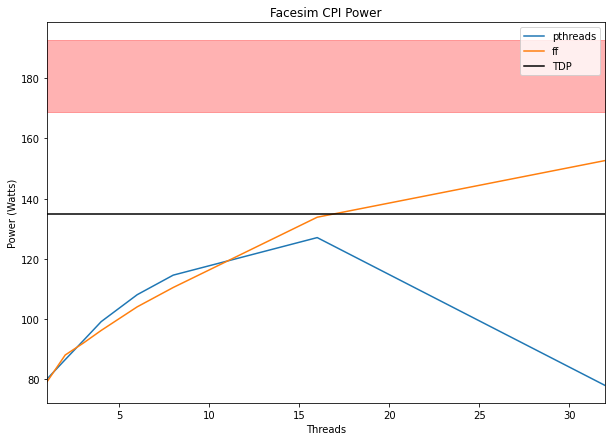

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(facesim_pthreads.Threads, facesim_pthreads.Time,label = "pthreads")
plt.plot(facesim_ff.Threads, facesim_ff.Time, label = "ff")
plt.title("Facesim execution time comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Time (s)")
plt.legend()
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(facesim_pthreads.Threads, facesim_pthreads.JoulesCpuAll,label = "pthreads")
plt.plot(facesim_ff.Threads, facesim_ff.JoulesCpuAll, label = "ff")
plt.title("Facesim CPU enrgy consumption comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Energy (joule)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(facesim_pthreads.Threads,facesim_pthreads.JoulesCpuAll/ facesim_pthreads.Time,label = "pthreads")
plt.plot(facesim_ff.Threads,facesim_ff.JoulesCpuAll/ facesim_ff.Time,label = "ff")
plt.axhline(y=135, color='black', linestyle='-', label="TDP")
Max_1 = 135*100/80
Max_2 = 135*100/70
plt.xlim([1,32])
plt.plot(Max_1, color='r', linestyle='-')
plt.plot(Max_2, color='r', linestyle='-')
plt.fill_between(facesim_ff.Threads, Max_1, Max_2, color='r', alpha=0.3)
plt.title("Facesim CPI Power")
plt.xlabel("Threads")
plt.ylabel("Power (Watts)")
plt.legend()
plt.show()

## Facesim : FastFlow vs Pthreads

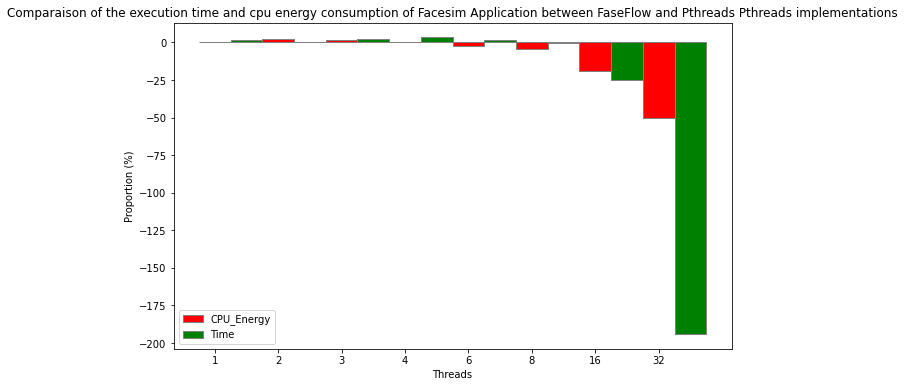

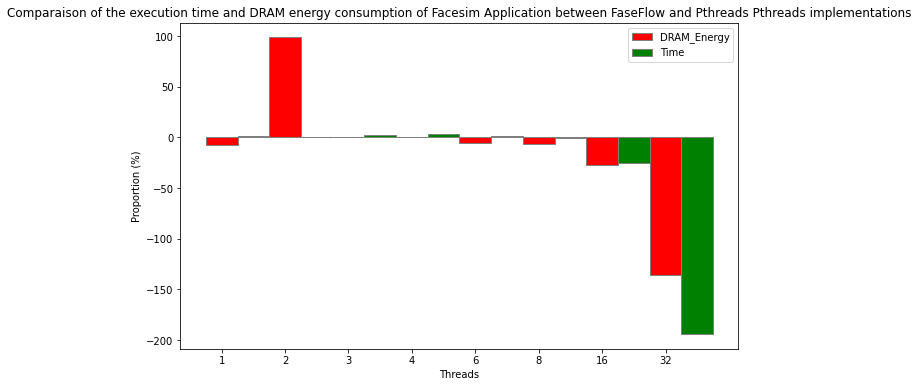

In [22]:
label1 = "FaseFlow"
label2 = "Pthreads"
fig, ax = plt.subplots(figsize =(10, 6))
# set height of bar
barWidth = 0.5
br1 = np.array([1,2,3,4,5,6,7,8])
br2 = [x + barWidth for x in br1]
plt.bar(br1, 100 - 100* facesim_pthreads.JoulesCpuAll / facesim_ff.JoulesCpuAll, color ='r', width = barWidth,
            edgecolor ='grey', label ='CPU_Energy')
plt.bar(br2, 100 - 100* facesim_pthreads.Time / facesim_ff.Time, color ='g', width = barWidth,
            edgecolor ='grey', label ='Time')
plt.xlabel("Threads")
plt.ylabel("Proportion (%)")
plt.title("Comparaison of the execution time and cpu energy consumption of Facesim Application between "+label1+" and "+label2+" Pthreads implementations")
ax.set_xticks(br1)
ax.set_xticklabels(('1', '2', '3', '4', '6', '8', '16', '32'))
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize =(10, 6))
# set height of bar
barWidth = 0.5
br1 = np.array([1,2,3,4,5,6,7,8])
br2 = [x + barWidth for x in br1]
plt.bar(br1, 100 - 100* facesim_pthreads.JoulesDramAll / facesim_ff.JoulesDramAll, color ='r', width = barWidth,
            edgecolor ='grey', label ='DRAM_Energy')
plt.bar(br2, 100 - 100* facesim_pthreads.Time / facesim_ff.Time, color ='g', width = barWidth,
            edgecolor ='grey', label ='Time')
plt.xlabel("Threads")
plt.ylabel("Proportion (%)")
plt.title("Comparaison of the execution time and DRAM energy consumption of Facesim Application between "+label1+" and "+label2+" Pthreads implementations")
ax.set_xticks(br1)
ax.set_xticklabels(('1', '2', '3', '4', '6', '8', '16', '32'))
plt.legend()
plt.show()

## Streamcluster benchmark results

In [10]:
streamcluster_ff = pd.read_csv("streamcluster/benchmark-gcc-ff.out")
streamcluster_pthreads = pd.read_csv("streamcluster/benchmark-gcc-pthreads.out")
streamcluster_openmp = pd.read_csv("streamcluster/benchmark-gcc-openmp.out")
streamcluster_tbb = pd.read_csv("streamcluster/benchmark-gcc-tbb.out")

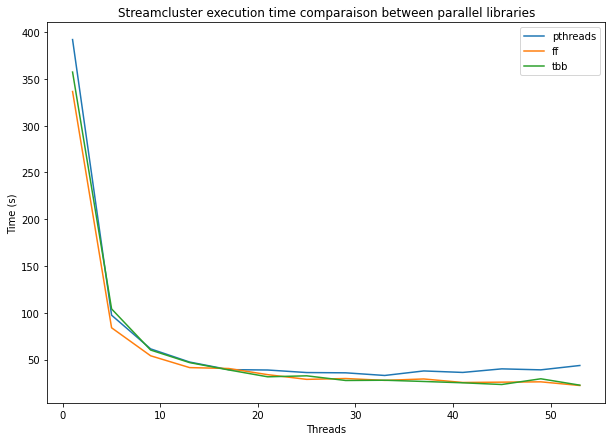

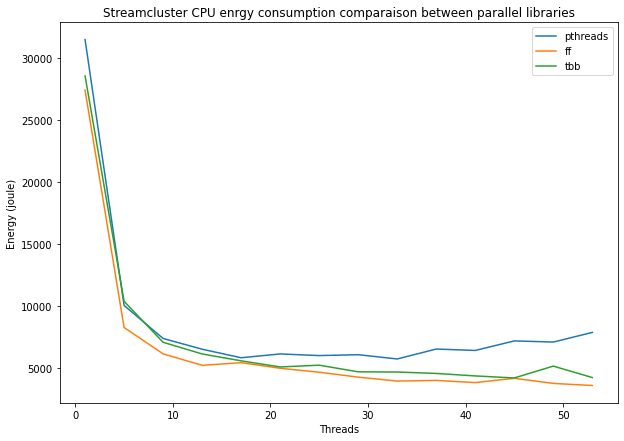

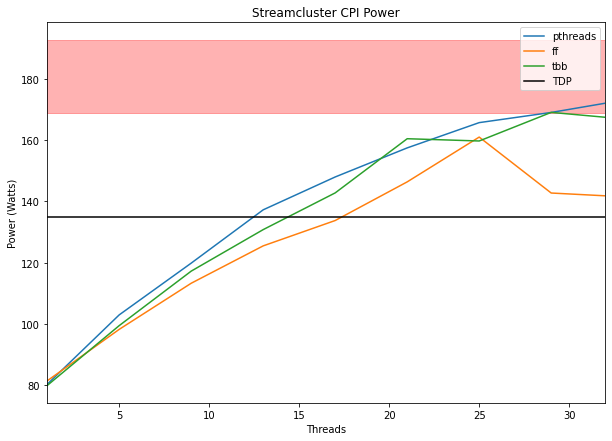

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(streamcluster_pthreads.Threads, streamcluster_pthreads.Time,label = "pthreads")
plt.plot(streamcluster_ff.Threads, streamcluster_ff.Time, label = "ff")
#plt.plot(streamcluster_openmp.Threads, streamcluster_openmp.Time, label = "openmp")
plt.plot(streamcluster_tbb.Threads, streamcluster_tbb.Time, label = "tbb")
plt.title("Streamcluster execution time comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Time (s)")
plt.legend()
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(streamcluster_pthreads.Threads, streamcluster_pthreads.JoulesCpuAll,label = "pthreads")
plt.plot(streamcluster_ff.Threads, streamcluster_ff.JoulesCpuAll, label = "ff")
#plt.plot(streamcluster_openmp.Threads, streamcluster_openmp.JoulesCpuAll,label = "openmp")
plt.plot(streamcluster_tbb.Threads, streamcluster_tbb.JoulesCpuAll, label = "tbb")
plt.title("Streamcluster CPU enrgy consumption comparaison between parallel libraries")
plt.xlabel("Threads")
plt.ylabel("Energy (joule)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(streamcluster_pthreads.Threads,streamcluster_pthreads.JoulesCpuAll/ streamcluster_pthreads.Time,label = "pthreads")
plt.plot(streamcluster_ff.Threads,streamcluster_ff.JoulesCpuAll/ streamcluster_ff.Time,label = "ff")
#plt.plot(streamcluster_openmp.Threads,streamcluster_openmp.JoulesCpuAll/(streamcluster_openmp.Time),label = "openmp")
plt.plot(streamcluster_tbb.Threads,streamcluster_tbb.JoulesCpuAll/ streamcluster_tbb.Time,label = "tbb")
plt.axhline(y=135, color='black', linestyle='-', label="TDP")
Max_1 = 135*100/80
Max_2 = 135*100/70
plt.xlim([1,32])
plt.plot(Max_1, color='r', linestyle='-')
plt.plot(Max_2, color='r', linestyle='-')
plt.fill_between(streamcluster_pthreads.Threads, Max_1, Max_2, color='r', alpha=0.3)
plt.title("Streamcluster CPI Power")
plt.xlabel("Threads")
plt.ylabel("Power (Watts)")
plt.legend()
plt.show()

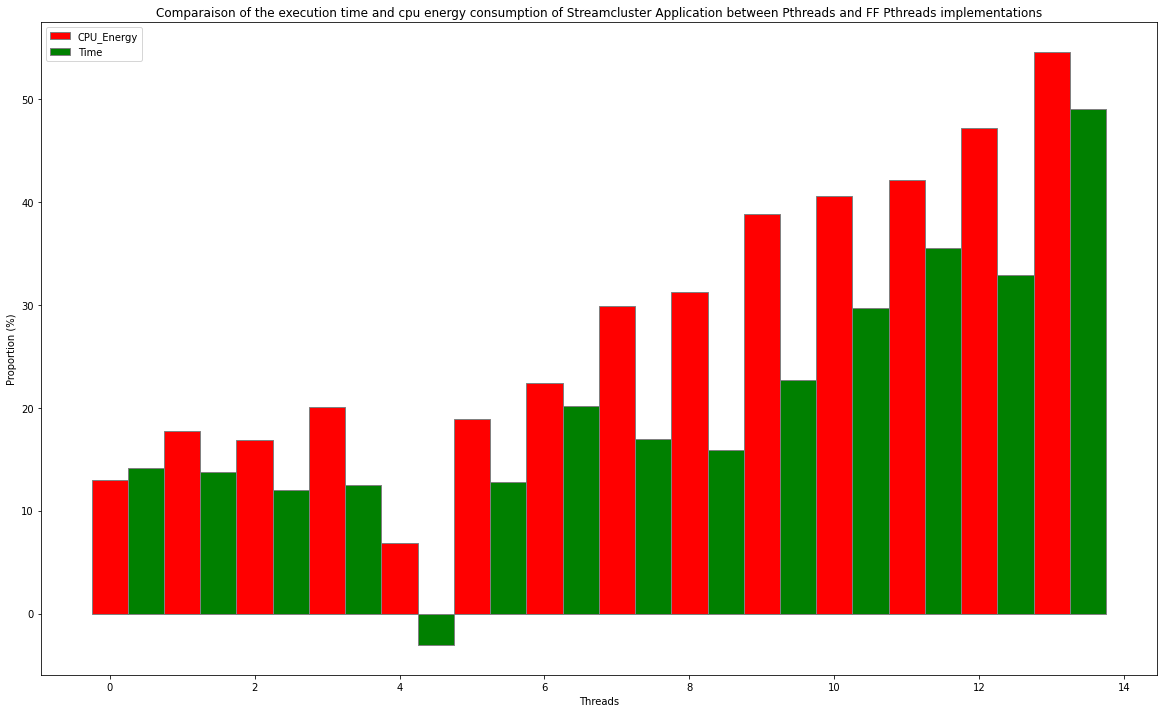

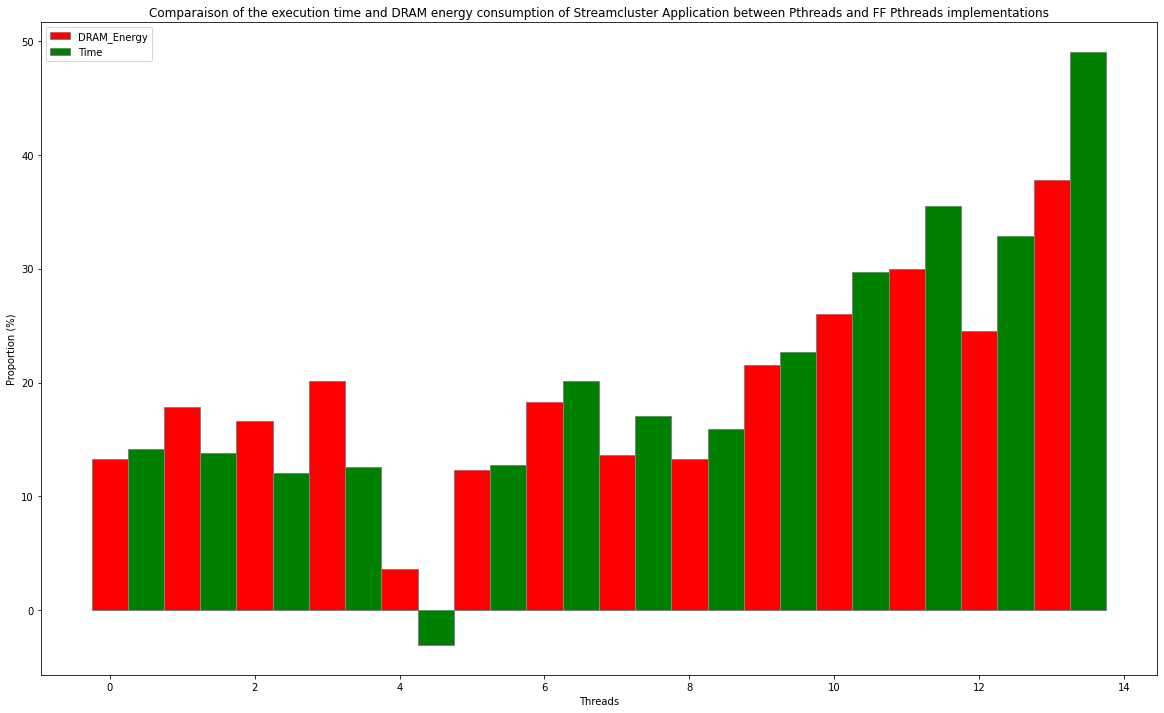

In [12]:
compare_cpu_energy_plot(streamcluster_pthreads,streamcluster_ff,"Pthreads","FF","Streamcluster")
compare_dram_energy_plot(streamcluster_pthreads,streamcluster_ff,"Pthreads","FF","Streamcluster")

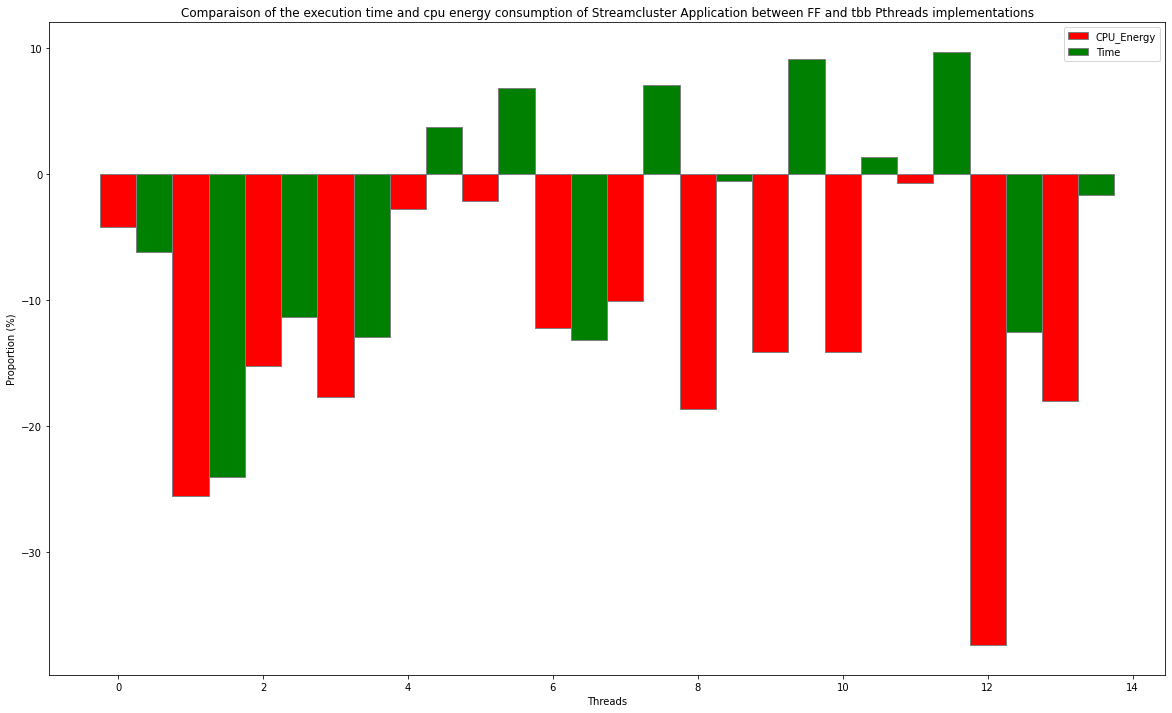

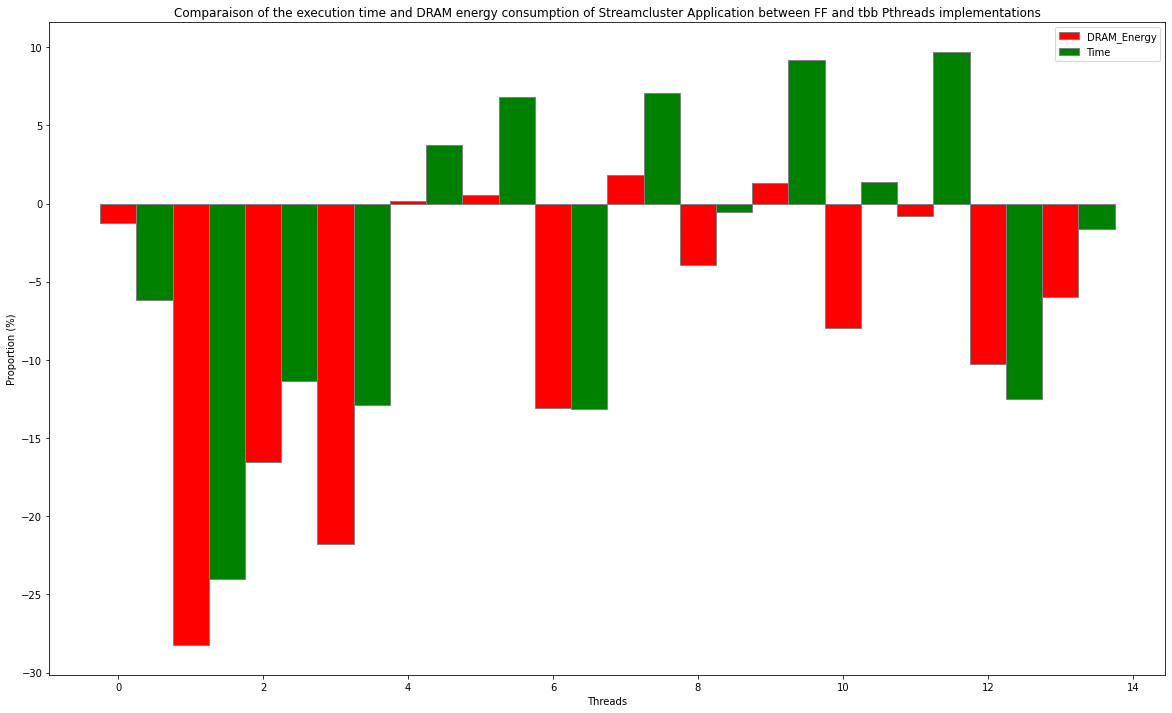

In [13]:
compare_cpu_energy_plot(streamcluster_ff,streamcluster_tbb,"FF","tbb","Streamcluster")
compare_dram_energy_plot(streamcluster_ff,streamcluster_tbb,"FF","tbb","Streamcluster")

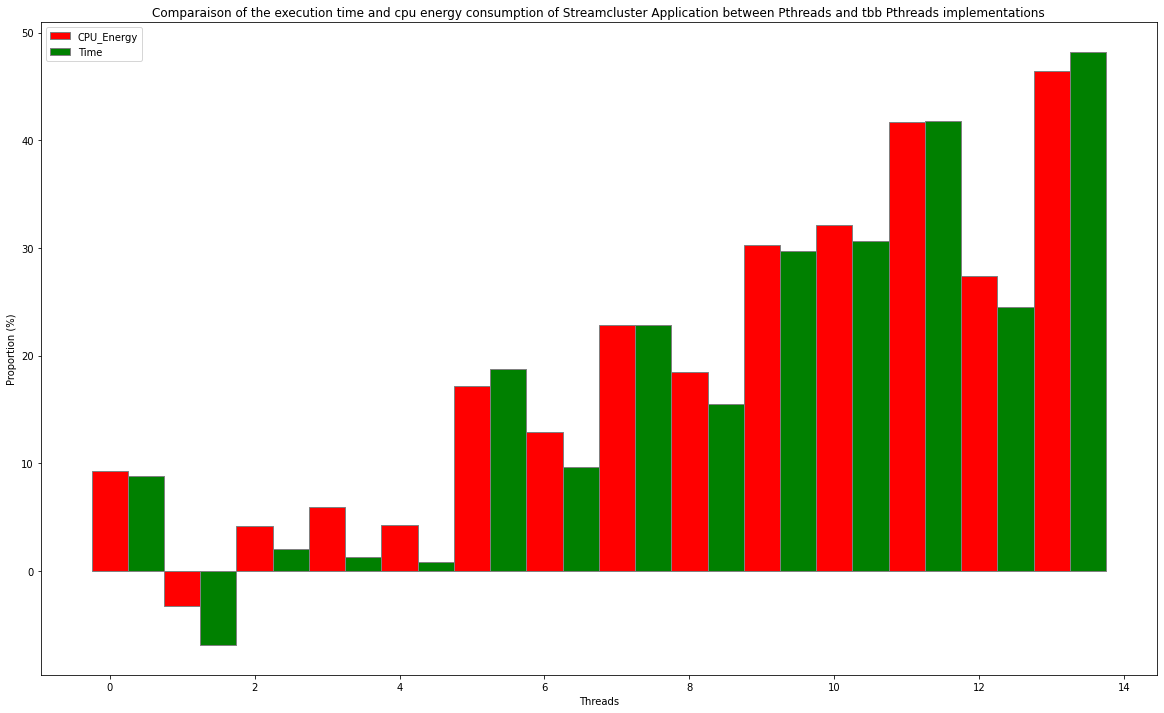

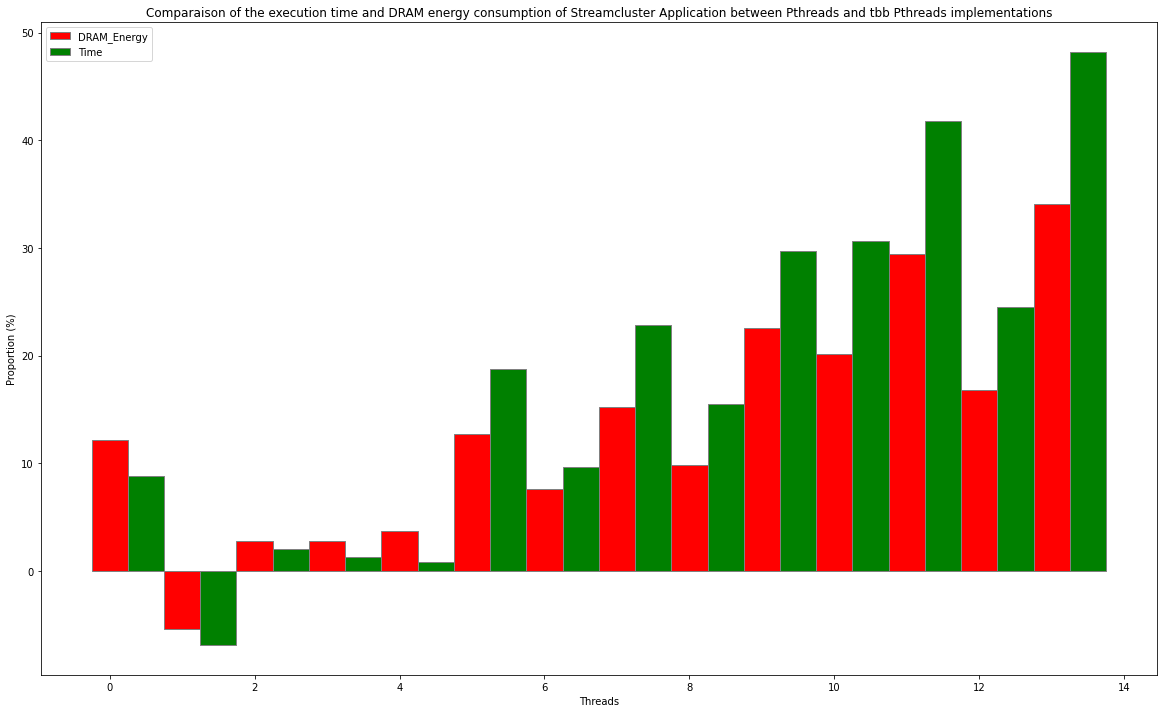

In [14]:
compare_cpu_energy_plot(streamcluster_pthreads,streamcluster_tbb,"Pthreads","tbb","Streamcluster")
compare_dram_energy_plot(streamcluster_pthreads,streamcluster_tbb,"Pthreads","tbb","Streamcluster")

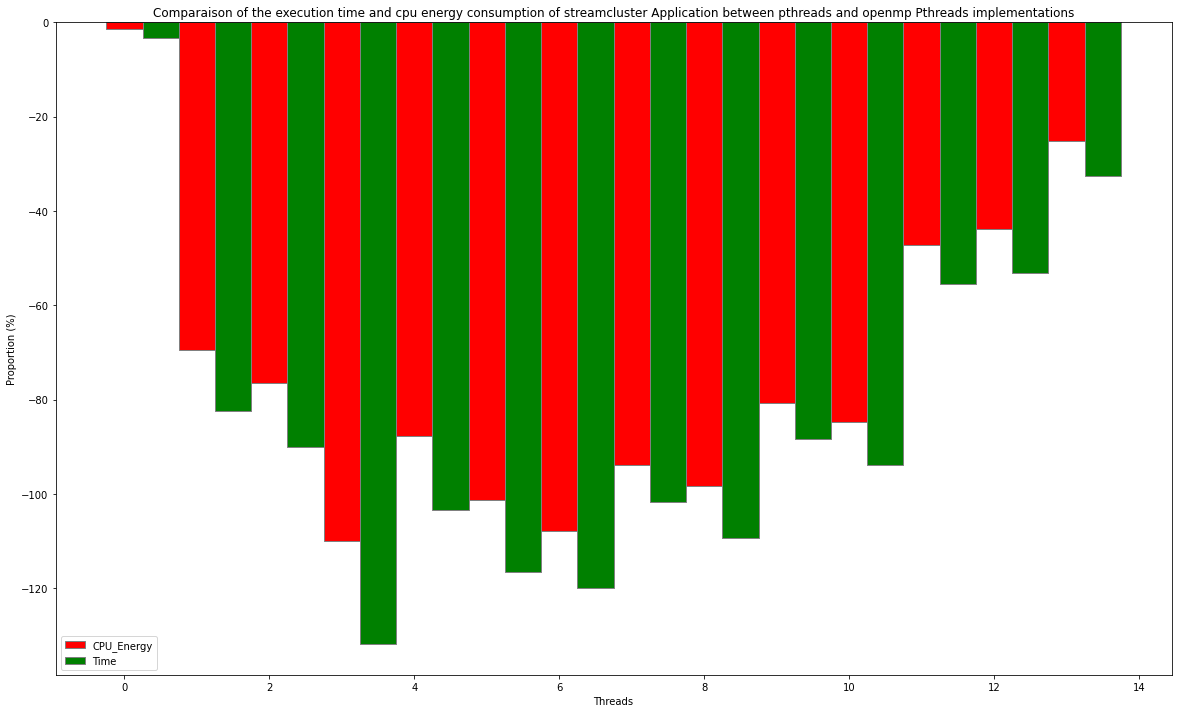

In [15]:
df2 = streamcluster_openmp
df1 = streamcluster_pthreads
label1 = "pthreads"
label2 = "openmp"
application_name = "streamcluster"

fig = plt.subplots(figsize =(20, 12))
# set height of bar
barWidth = 0.5
br1 = np.arange(len(df1.index))
br2 = [x + barWidth for x in br1]
plt.bar(br1, 100 - 100* df2.JoulesCpuAll / df1.PCM_energy, color ='r', width = barWidth,
        edgecolor ='grey', label ='CPU_Energy')
plt.bar(br2, 100 - 100* df2.Time / df1.Time, color ='g', width = barWidth,
         edgecolor ='grey', label ='Time')
plt.xlabel("Threads")
plt.ylabel("Proportion (%)")
plt.title("Comparaison of the execution time and cpu energy consumption of "+application_name+" Application between "+label1+" and "+label2+" Pthreads implementations")
plt.legend()
plt.show()

